In [1]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx import DiGraph
import numpy as np
import os
import sys
from typing import List, Tuple

In [2]:
sys.path.append("../")
test_dir = os.path.abspath("../tests")
sys.path.append(test_dir)

In [3]:
from job_scheduler.model import Job, Operation, Schedule, ScheduledJob
from job_scheduler.optimizer import ScheduleOptimizer
from job_scheduler.scheduler import JobScheduler

## Overall Schedule

In [4]:
overall_schedule_json = \
{
    "directed": True,
    "nodes": [
        {"id": "start"},
        {"id": "J411"},
        {"id": "J421"},
        {"id": "J422"},
        {"id": "J111"},
        {"id": "J121"},
        {"id": "J112"},
        {"id": "J122"},
        {"id": "J123"},
        {"id": "J511"},
        {"id": "J512"},
        {"id": "J513"},
        {"id": "J514"},
        {"id": "J521"},
        {"id": "J522"},
        {"id": "J523"},
        {"id": "J524"},
        {"id": "J311"},
        {"id": "J312"},
        {"id": "J321"},
        {"id": "J211"},
        {"id": "J212"},
        {"id": "J213"},
        {"id": "J214"},
        {"id": "J215"},
        {"id": "J221"},
    ],
    "links": [
        {"source": "start", "target": "J411", "weight": 2},
        {"source": "start", "target": "J421", "weight": 2},
        {"source": "J411", "target": "J422", "weight": 2},
        {"source": "J421", "target": "J422", "weight": 0},
        {"source": "J422", "target": "J111", "weight": 2},
        {"source": "J422", "target": "J121", "weight": 2},
        {"source": "J111", "target": "J112", "weight": 2},
        {"source": "J121", "target": "J122", "weight": 2},
        {"source": "J122", "target": "J112", "weight": 0},
        {"source": "J112", "target": "J123", "weight": 2},
        {"source": "J123", "target": "J511", "weight": 2},
        {"source": "J123", "target": "J521", "weight": 2},
        {"source": "J511", "target": "J512", "weight": 2},
        {"source": "J521", "target": "J522", "weight": 2},
        {"source": "J512", "target": "J513", "weight": 2},
        {"source": "J522", "target": "J523", "weight": 2},
        {"source": "J513", "target": "J514", "weight": 2},
        {"source": "J523", "target": "J524", "weight": 2},
        {"source": "J514", "target": "J311", "weight": 2},
        {"source": "J524", "target": "J321", "weight": 2},
        {"source": "J311", "target": "J312", "weight": 1},
        {"source": "J321", "target": "J312", "weight": 0},
        {"source": "J312", "target": "J221", "weight": 1},
        {"source": "J312", "target": "J211", "weight": 2},
        {"source": "J211", "target": "J212", "weight": 2},
        {"source": "J221", "target": "J213", "weight": 2},
        {"source": "J213", "target": "J215", "weight": 2},
        {"source": "J212", "target": "J214", "weight": 2},
    ]
}

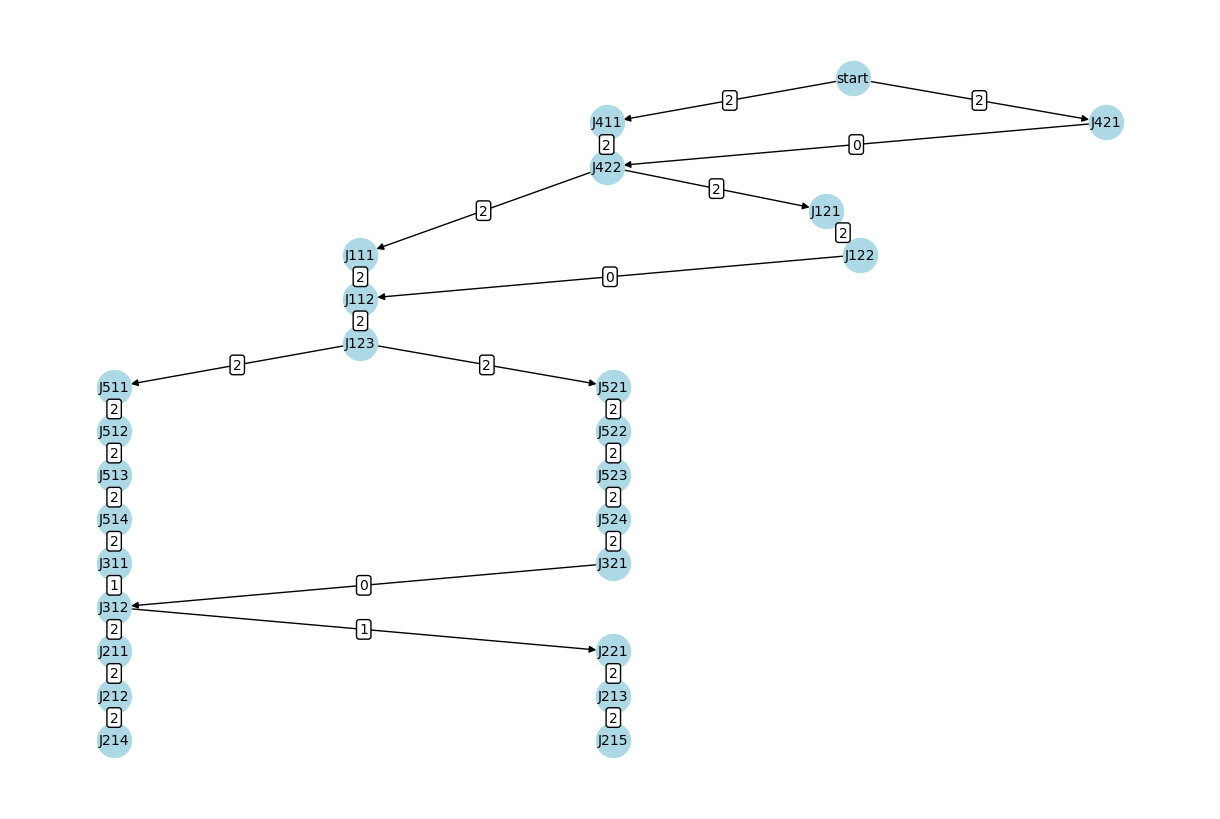

In [5]:
overall_schedule = JobScheduler.load_graph(overall_schedule_json)
JobScheduler.visualize_schedule(overall_schedule)

In [6]:
fig_size = (4, 4)

## Job 4

In [7]:
job_4_schedule_json = \
{
    "directed": True,
    "nodes": [
        {"id": "start"},
        {"id": "J411"},
        {"id": "J421"},
        {"id": "J422"},
    ],
    "links": [
        {"source": "start", "target": "J411", "weight": 2, "parallel_machines": [("start", "J421"), ("start", "J411")]},
        {"source": "start", "target": "J421", "weight": 2, "parallel_machines": [("start", "J421"), ("start", "J411")]},
        {"source": "J411", "target": "J422", "weight": 2, "parallel_machines": [("J421", "J422"), ("J411", "J422")]},
        {"source": "J421", "target": "J422", "weight": 0, "parallel_machines": [("J421", "J422"), ("J411", "J422")]},
    ]
}

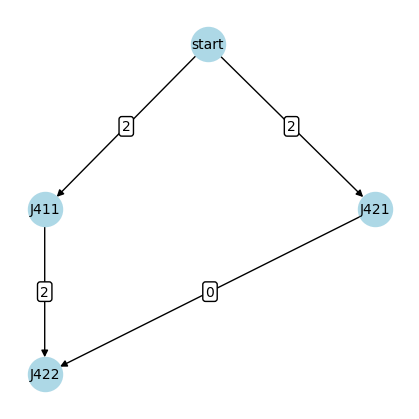

In [8]:
j4_schedule = JobScheduler.load_graph(job_4_schedule_json)
JobScheduler.visualize_schedule(j4_schedule, fig_size)

## Job 1

In [9]:
job_1_schedule_json = \
{
    "directed": True,
    "nodes": [
        {"id": "J422"},
        {"id": "J111"},
        {"id": "J121"},
        {"id": "J112"},
        {"id": "J122"},
        {"id": "J123"},
    ],
    "links": [
        {"source": "J422", "target": "J111", "weight": 2, "parallel_machines": [("J422", "J111"), ("J422", "J121")]},
        {"source": "J422", "target": "J121", "weight": 2, "parallel_machines": [("J422", "J111"), ("J422", "J121")]},
        {"source": "J111", "target": "J112", "weight": 2, "parallel_machines": [("J111", "J112"), ("J121", "J122")]},
        {"source": "J121", "target": "J122", "weight": 2, "parallel_machines": [("J111", "J112"), ("J121", "J122")]},
        {"source": "J122", "target": "J112", "weight": 0, "parallel_machines": [("J122", "J112"), ("J112", "J123")]},
        {"source": "J112", "target": "J123", "weight": 2, "parallel_machines": [("J122", "J112"), ("J112", "J123")]},
    ]
}

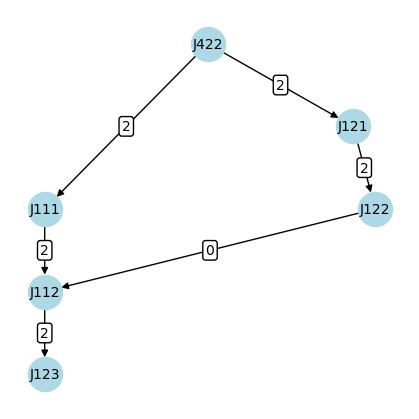

In [10]:
j1_schedule = JobScheduler.load_graph(job_1_schedule_json)
JobScheduler.visualize_schedule(j1_schedule, fig_size)

## Job 5

In [11]:
job_5_schedule_json = \
{
    "directed": True,
    "nodes": [
        {"id": "J511"},
        {"id": "J512"},
        {"id": "J513"},
        {"id": "J514"},
        {"id": "J521"},
        {"id": "J522"},
        {"id": "J523"},
        {"id": "J524"},
    ],
    "links": [
        {"source": "J123", "target": "J511", "weight": 2, "parallel_machines": [("J123", "J511"), ("J123", "J521")]},
        {"source": "J123", "target": "J521", "weight": 2, "parallel_machines": [("J123", "J511"), ("J123", "J521")]},
        {"source": "J511", "target": "J512", "weight": 2, "parallel_machines": [("J511", "J512"), ("J521", "J522")]},
        {"source": "J521", "target": "J522", "weight": 2, "parallel_machines": [("J511", "J512"), ("J521", "J522")]},
        {"source": "J512", "target": "J513", "weight": 2, "parallel_machines": [("J512", "J513"), ("J522", "J523")]},
        {"source": "J522", "target": "J523", "weight": 2, "parallel_machines": [("J512", "J513"), ("J522", "J523")]},
        {"source": "J513", "target": "J514", "weight": 2, "parallel_machines": [("J513", "J514"), ("J523", "J524")]},
        {"source": "J523", "target": "J524", "weight": 2, "parallel_machines": [("J513", "J514"), ("J523", "J524")]},
    ]
}

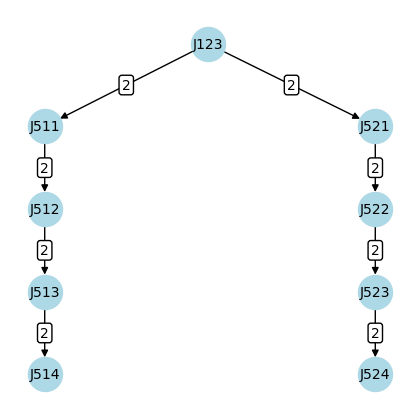

In [12]:
j5_schedule = JobScheduler.load_graph(job_5_schedule_json)
JobScheduler.visualize_schedule(j5_schedule, fig_size)

## Job 3

In [13]:
job_3_schedule_json = \
{
    "directed": True,
    "nodes": [
        {"id": "J514"},
        {"id": "J524"},
        {"id": "J311"},
        {"id": "J312"},
    ],
    "links": [
        {"source": "J514", "target": "J311", "weight": 2, "parallel_machines": [("J514", "J311"), ("J524", "J321")]},
        {"source": "J524", "target": "J321", "weight": 2, "parallel_machines": [("J514", "J311"), ("J524", "J321")]},
        {"source": "J311", "target": "J312", "weight": 1, "parallel_machines": [("J311", "J312"), ("J321", "J312")]},
        {"source": "J321", "target": "J312", "weight": 0, "parallel_machines": [("J311", "J312"), ("J321", "J312")]},
    ]
}

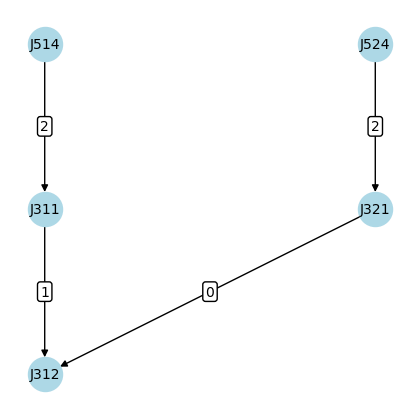

In [14]:
j3_schedule = JobScheduler.load_graph(job_3_schedule_json)
JobScheduler.visualize_schedule(j3_schedule, fig_size)

## Job 2

In [15]:
job_2_schedule_json = \
{
    "directed": True,
    "nodes": [
        {"id": "J312"},
        {"id": "J211"},
        {"id": "J212"},
        {"id": "J213"},
        {"id": "J214"},
        {"id": "J215"},
        {"id": "J221"},
    ],
    "links": [
        {"source": "J312", "target": "J221", "weight": 1, "parallel_machines": [("J312", "J221"), ("J312", "J211")]},
        {"source": "J312", "target": "J211", "weight": 2, "parallel_machines": [("J312", "J221"), ("J312", "J211")]},
        {"source": "J211", "target": "J212", "weight": 2, "parallel_machines": [("J211", "J212"), ("J221", "J213")]},
        {"source": "J221", "target": "J213", "weight": 2, "parallel_machines": [("J211", "J212"), ("J221", "J213")]},
        {"source": "J213", "target": "J215", "weight": 2, "parallel_machines": [("J213", "J215"), ("J212", "J214")]},
        {"source": "J212", "target": "J214", "weight": 2, "parallel_machines": [("J213", "J215"), ("J212", "J214")]},
    ]
}

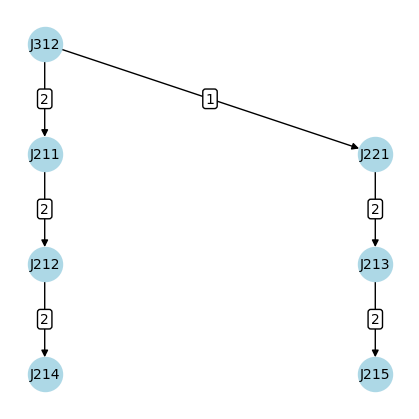

In [16]:
j2_schedule = JobScheduler.load_graph(job_2_schedule_json)
JobScheduler.visualize_schedule(j2_schedule, fig_size)

In [17]:
jobs = [Job(id=4,operations=j4_schedule),
            Job(id=1,operations=j1_schedule),
            Job(id=5,operations=j5_schedule),
            Job(id=3,operations=j3_schedule),
            Job(id=2,operations=j2_schedule)]
jobs

[Job(id=4, operations=<networkx.classes.multidigraph.MultiDiGraph object at 0x12f719130>),
 Job(id=1, operations=<networkx.classes.multidigraph.MultiDiGraph object at 0x12f78c610>),
 Job(id=5, operations=<networkx.classes.multidigraph.MultiDiGraph object at 0x12f801cd0>),
 Job(id=3, operations=<networkx.classes.multidigraph.MultiDiGraph object at 0x12f719ac0>),
 Job(id=2, operations=<networkx.classes.multidigraph.MultiDiGraph object at 0x12f57ddc0>)]

In [18]:
def get_max_ops_time(operations: DiGraph, 
                     parallel_machines: List[Tuple[str, str]],
                     nodes_counted: Tuple[str, str]):
    ops_times = []
    
    for parallel_op in parallel_machines: 
        if parallel_op not in nodes_counted:
            operation = operations.get_edge_data(parallel_op[0], parallel_op[1])
            nodes_counted.append(parallel_op)
            ops_times.append(operation[0]['weight'])

    if len(ops_times) > 0:
        return max(ops_times)
    else:
        return 0

In [19]:
make_span = 0

for job in jobs:
    operations = job.operations
    nodes_counted: Tuple[str, str] = []
    
    for source_operation, destination_operation, machine in operations.edges(data=True):
        if 'parallel_machines' in machine.keys():
            max_ops_time = get_max_ops_time(operations, machine['parallel_machines'], nodes_counted)
            
            print(f"Source: {source_operation} \
                    Destination: {destination_operation} \
                    Machine Operations: {machine['parallel_machines']} \
                    Max_Ops_Time: {max_ops_time}")
            make_span += max_ops_time

print(f"Makespan: {make_span}")

Source: start                     Destination: J411                     Machine Operations: [('start', 'J421'), ('start', 'J411')]                     Max_Ops_Time: 2
Source: start                     Destination: J421                     Machine Operations: [('start', 'J421'), ('start', 'J411')]                     Max_Ops_Time: 0
Source: J411                     Destination: J422                     Machine Operations: [('J421', 'J422'), ('J411', 'J422')]                     Max_Ops_Time: 2
Source: J421                     Destination: J422                     Machine Operations: [('J421', 'J422'), ('J411', 'J422')]                     Max_Ops_Time: 0
Source: J422                     Destination: J111                     Machine Operations: [('J422', 'J111'), ('J422', 'J121')]                     Max_Ops_Time: 2
Source: J422                     Destination: J121                     Machine Operations: [('J422', 'J111'), ('J422', 'J121')]                     Max_Ops_Time: 0
Source: J1

In [20]:
jobs[0]

Job(id=4, operations=<networkx.classes.multidigraph.MultiDiGraph object at 0x12f719130>)

In [21]:
for job in jobs:
    print(job.operations.edges)

[('start', 'J411', 0), ('start', 'J421', 0), ('J411', 'J422', 0), ('J421', 'J422', 0)]
[('J422', 'J111', 0), ('J422', 'J121', 0), ('J111', 'J112', 0), ('J121', 'J122', 0), ('J112', 'J123', 0), ('J122', 'J112', 0)]
[('J511', 'J512', 0), ('J512', 'J513', 0), ('J513', 'J514', 0), ('J521', 'J522', 0), ('J522', 'J523', 0), ('J523', 'J524', 0), ('J123', 'J511', 0), ('J123', 'J521', 0)]
[('J514', 'J311', 0), ('J524', 'J321', 0), ('J311', 'J312', 0), ('J321', 'J312', 0)]
[('J312', 'J221', 0), ('J312', 'J211', 0), ('J211', 'J212', 0), ('J212', 'J214', 0), ('J213', 'J215', 0), ('J221', 'J213', 0)]


In [22]:
schedule = Schedule(jobs=jobs)
schedule

Schedule(jobs=[Job(id=4, operations=<networkx.classes.multidigraph.MultiDiGraph object at 0x12f719130>), Job(id=1, operations=<networkx.classes.multidigraph.MultiDiGraph object at 0x12f78c610>), Job(id=5, operations=<networkx.classes.multidigraph.MultiDiGraph object at 0x12f801cd0>), Job(id=3, operations=<networkx.classes.multidigraph.MultiDiGraph object at 0x12f719ac0>), Job(id=2, operations=<networkx.classes.multidigraph.MultiDiGraph object at 0x12f57ddc0>)], debug=False)

In [4]:
job_1 = ScheduledJob(job_id=1, operations=[Operation(id=1, time=3), Operation(id=2, time=6)])
job_2 = ScheduledJob(job_id=2, operations=[Operation(id=1, time=10), Operation(id=2, time=1)])
job_3 = ScheduledJob(job_id=3, operations=[Operation(id=1, time=3), Operation(id=2, time=2)])
job_4 = ScheduledJob(job_id=4, operations=[Operation(id=1, time=2), Operation(id=2, time=4)])
job_5 = ScheduledJob(job_id=5, operations=[Operation(id=1, time=8), Operation(id=2, time=8)])

job_operations = [job_1, job_2, job_3, job_4, job_5]
job_operations

[ScheduledJob(job_id=1, operations=[Operation(id=1, time=3), Operation(id=2, time=6)]),
 ScheduledJob(job_id=2, operations=[Operation(id=1, time=10), Operation(id=2, time=1)]),
 ScheduledJob(job_id=3, operations=[Operation(id=1, time=3), Operation(id=2, time=2)]),
 ScheduledJob(job_id=4, operations=[Operation(id=1, time=2), Operation(id=2, time=4)]),
 ScheduledJob(job_id=5, operations=[Operation(id=1, time=8), Operation(id=2, time=8)])]

In [5]:
schedule_optimzer = ScheduleOptimizer(scheduled_jobs=job_operations,
                                      num_of_machines=2,
                                      num_ops_per_machine=2)
schedule_optimzer

In [6]:
job_scheduler = JobScheduler(num_of_machines=2,
                             num_ops_per_machine=2,
                             scheduled_jobs=job_operations)
job_scheduler

In [7]:
schedule = job_scheduler.generate_schedule()
schedule

Schedule(jobs=[Job(id=1, operations=<networkx.classes.multidigraph.MultiDiGraph object at 0x103e1fdc0>), Job(id=2, operations=<networkx.classes.multidigraph.MultiDiGraph object at 0x103e1ff70>), Job(id=3, operations=<networkx.classes.multidigraph.MultiDiGraph object at 0x103e1f610>), Job(id=4, operations=<networkx.classes.multidigraph.MultiDiGraph object at 0x103e1f430>), Job(id=5, operations=<networkx.classes.multidigraph.MultiDiGraph object at 0x103e1f880>)], debug=False)

In [8]:
schedule.compute_makespan()

27

In [9]:
schedule_optimzer._current_schedule.jobs

[Job(id=1, operations=<networkx.classes.multidigraph.MultiDiGraph object at 0x117fb00d0>),
 Job(id=2, operations=<networkx.classes.multidigraph.MultiDiGraph object at 0x117fb2040>),
 Job(id=3, operations=<networkx.classes.multidigraph.MultiDiGraph object at 0x117fb21c0>),
 Job(id=4, operations=<networkx.classes.multidigraph.MultiDiGraph object at 0x117fb2220>),
 Job(id=5, operations=<networkx.classes.multidigraph.MultiDiGraph object at 0x117fb2340>)]

In [10]:
print(f"New Schedule makespan: {schedule_optimzer.optimize()}")

New Schedule makespan: 27


In [11]:
new_schedule = schedule_optimzer._current_schedule
new_schedule

Schedule(jobs=[Job(id=1, operations=<networkx.classes.multidigraph.MultiDiGraph object at 0x117fb00d0>), Job(id=2, operations=<networkx.classes.multidigraph.MultiDiGraph object at 0x117fb2040>), Job(id=3, operations=<networkx.classes.multidigraph.MultiDiGraph object at 0x117fb21c0>), Job(id=4, operations=<networkx.classes.multidigraph.MultiDiGraph object at 0x117fb2220>), Job(id=5, operations=<networkx.classes.multidigraph.MultiDiGraph object at 0x117fb2340>)], debug=False)

In [ ]:
fig_size = (4, 4)
JobScheduler.visualize_schedule(schedule.jobs[0].operations, fig_size)

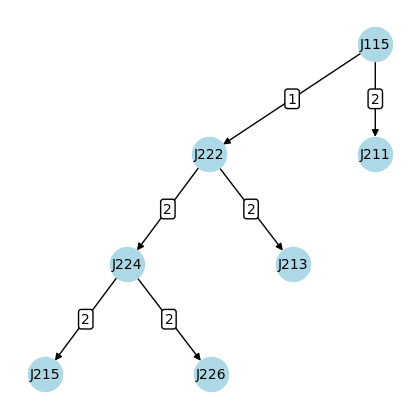

In [23]:
fig_size = (4, 4)
JobScheduler.visualize_schedule(schedule.jobs[1].operations, fig_size)

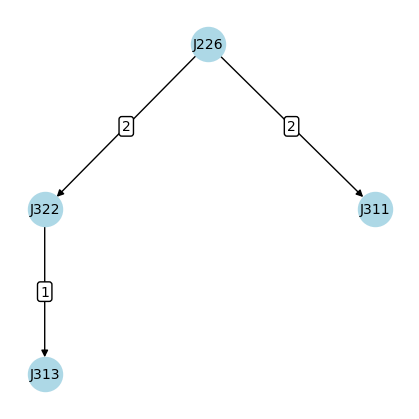

In [24]:
fig_size = (4, 4)
JobScheduler.visualize_schedule(schedule.jobs[2].operations, fig_size)

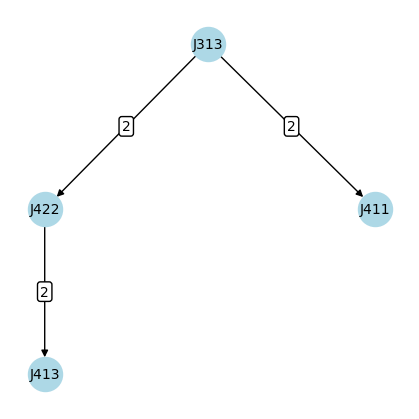

In [25]:
fig_size = (4, 4)
JobScheduler.visualize_schedule(schedule.jobs[3].operations, fig_size)

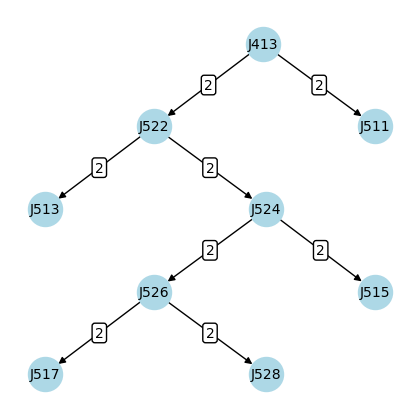

In [21]:
fig_size = (4, 4)
JobScheduler.visualize_schedule(schedule.jobs[4].operations, fig_size)

In [13]:
print(schedule_optimzer.get_boltzmann_distributon())

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [14]:
print(schedule_optimzer.get_makespan_time_series())

[27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27
 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27
 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27
 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27
 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27
 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27
 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27
 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27
 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27
 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27
 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27
 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27
 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27
 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27 27

## Generate Makespan Time Series

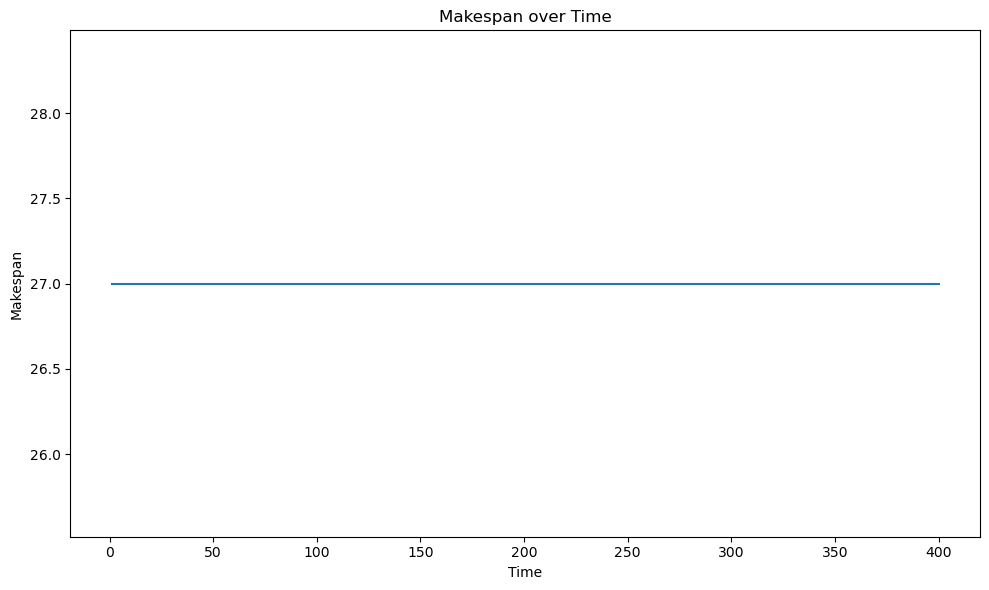

In [8]:
schedule_optimzer.plot_make_span()

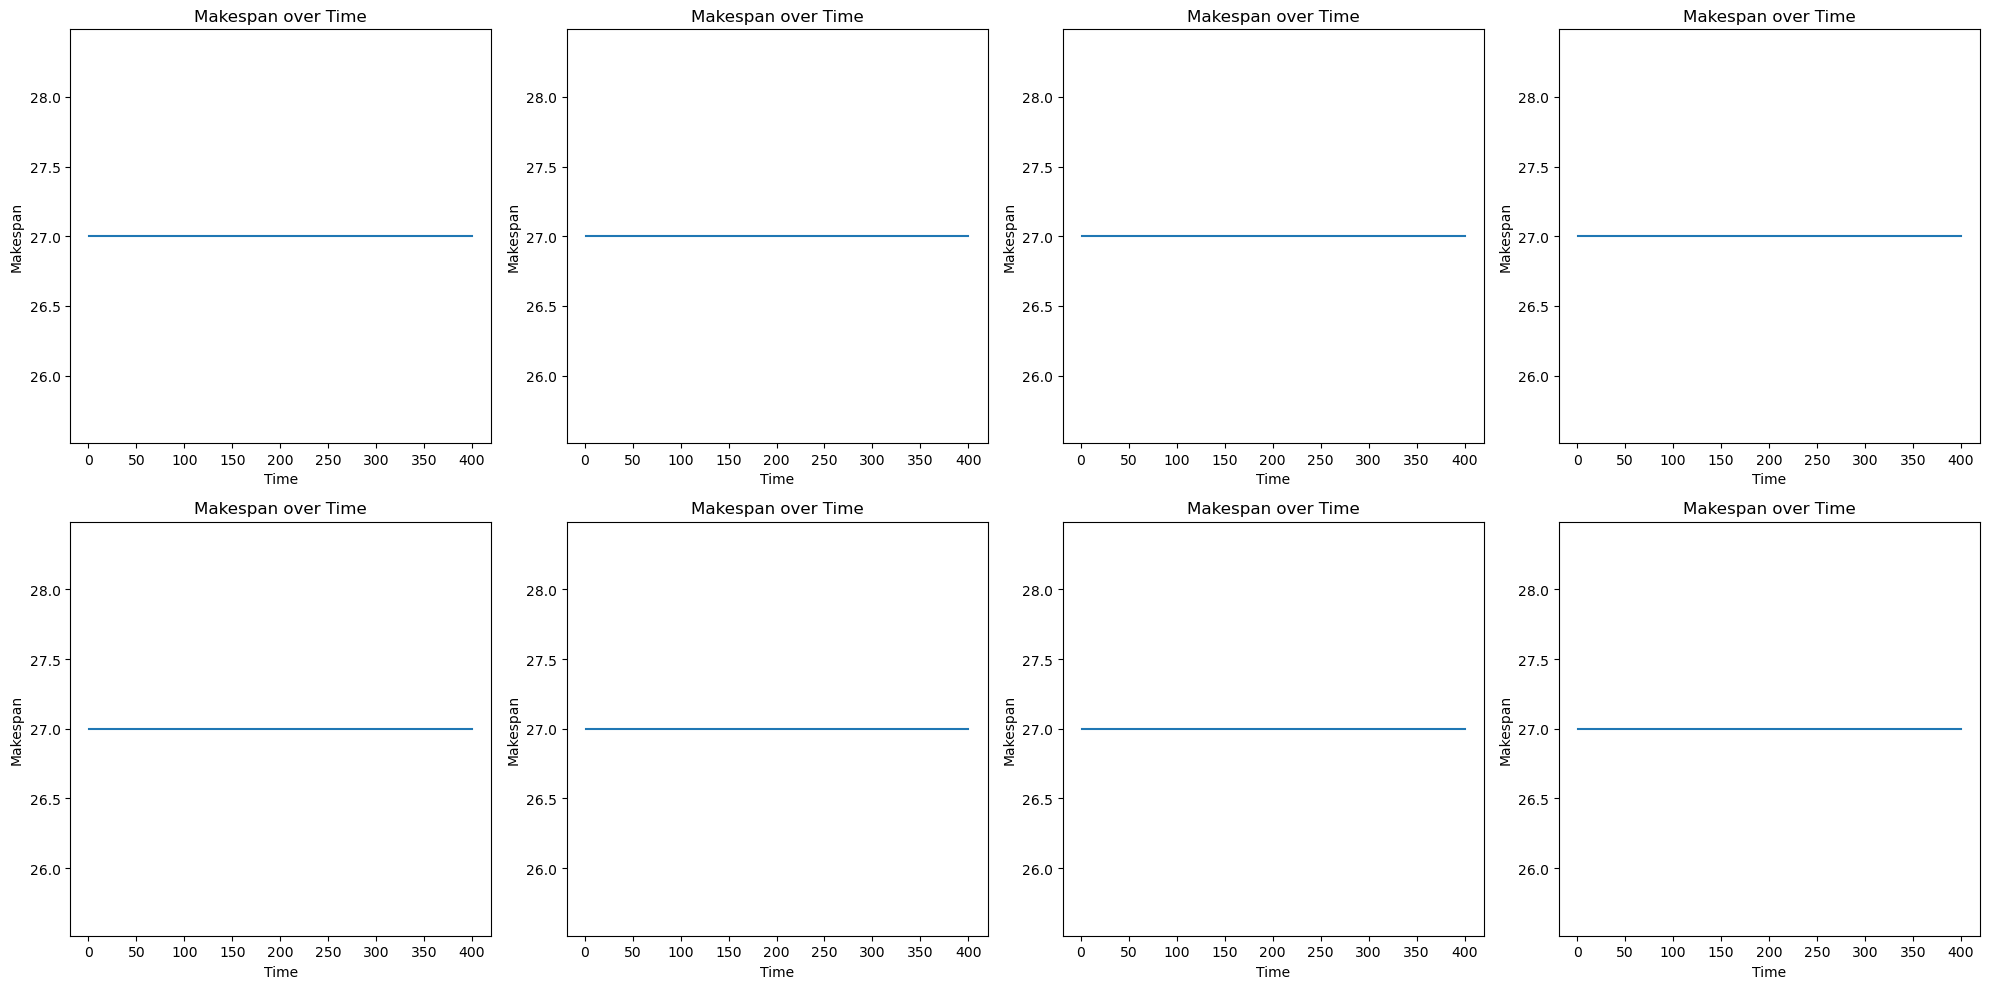

In [9]:
schedule_optimzer.plot_boltzmann_distributon()

## Generate 50 Jobs

In [4]:
scheduled_jobs = JobScheduler.generate_scheduled_jobs(num_of_jobs=50,
                                                      num_of_operations_per_job=3)

job_scheduler = JobScheduler(scheduled_jobs=scheduled_jobs,
                             num_of_machines=5,
                             num_ops_per_machine=3)

schedule = job_scheduler.generate_schedule()

schedule.compute_makespan()

479

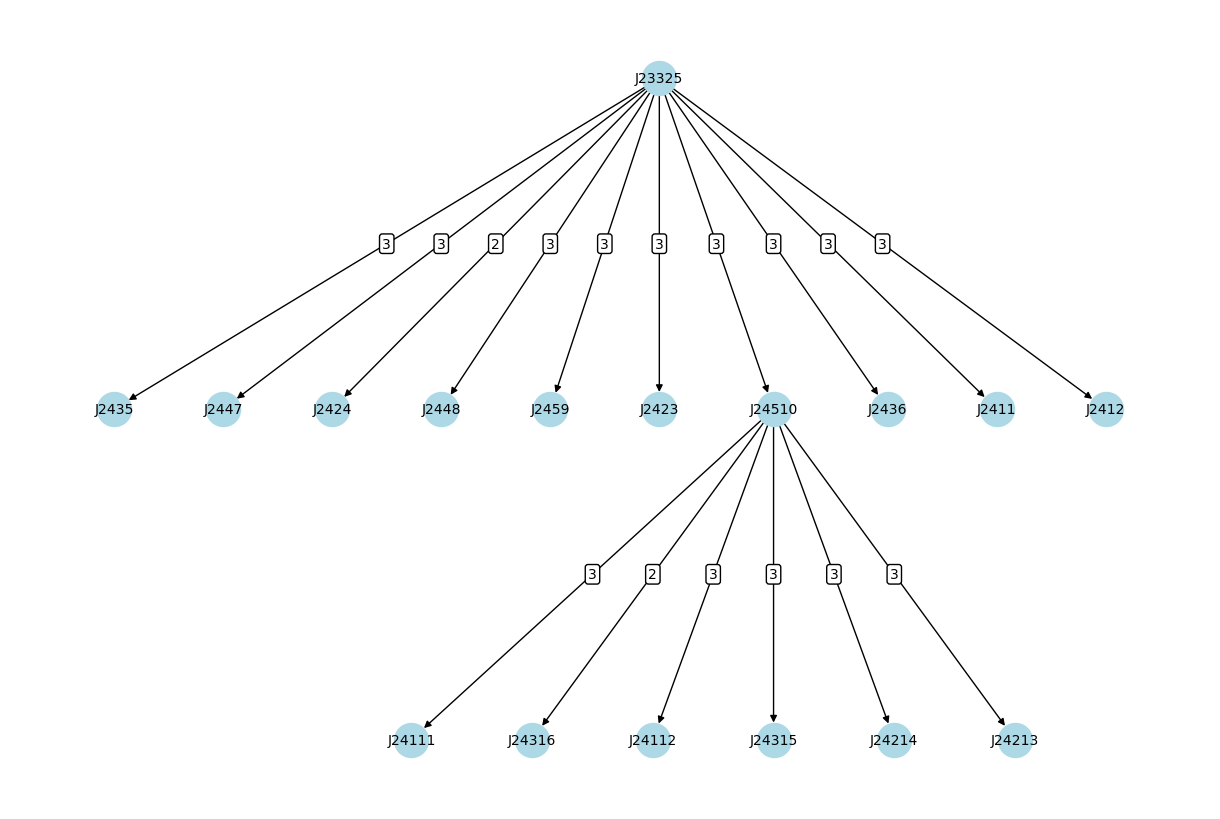

In [5]:
JobScheduler.visualize_schedule(schedule.jobs[23].operations)

In [6]:
num_of_machines=3
num_ops_per_machine=5

In [7]:
scheduled_jobs = JobScheduler.generate_scheduled_jobs(num_of_jobs=50,
                                                      num_of_operations_per_job=5)

job_scheduler = JobScheduler(scheduled_jobs=scheduled_jobs,
                             num_of_machines=num_of_machines,
                             num_ops_per_machine=num_ops_per_machine)

schedule = job_scheduler.generate_schedule()

schedule.compute_makespan()

716

In [8]:
schedule_optimzer = ScheduleOptimizer(scheduled_jobs=scheduled_jobs,
                                      num_of_machines=num_of_machines,
                                      num_ops_per_machine=num_ops_per_machine)
schedule_optimzer

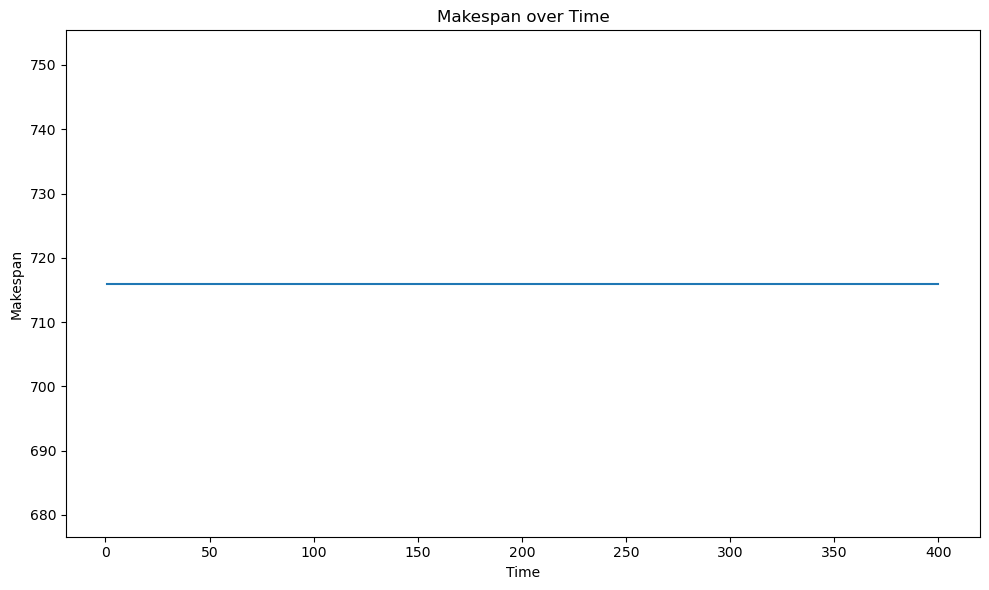

In [9]:
schedule_optimzer.plot_make_span()

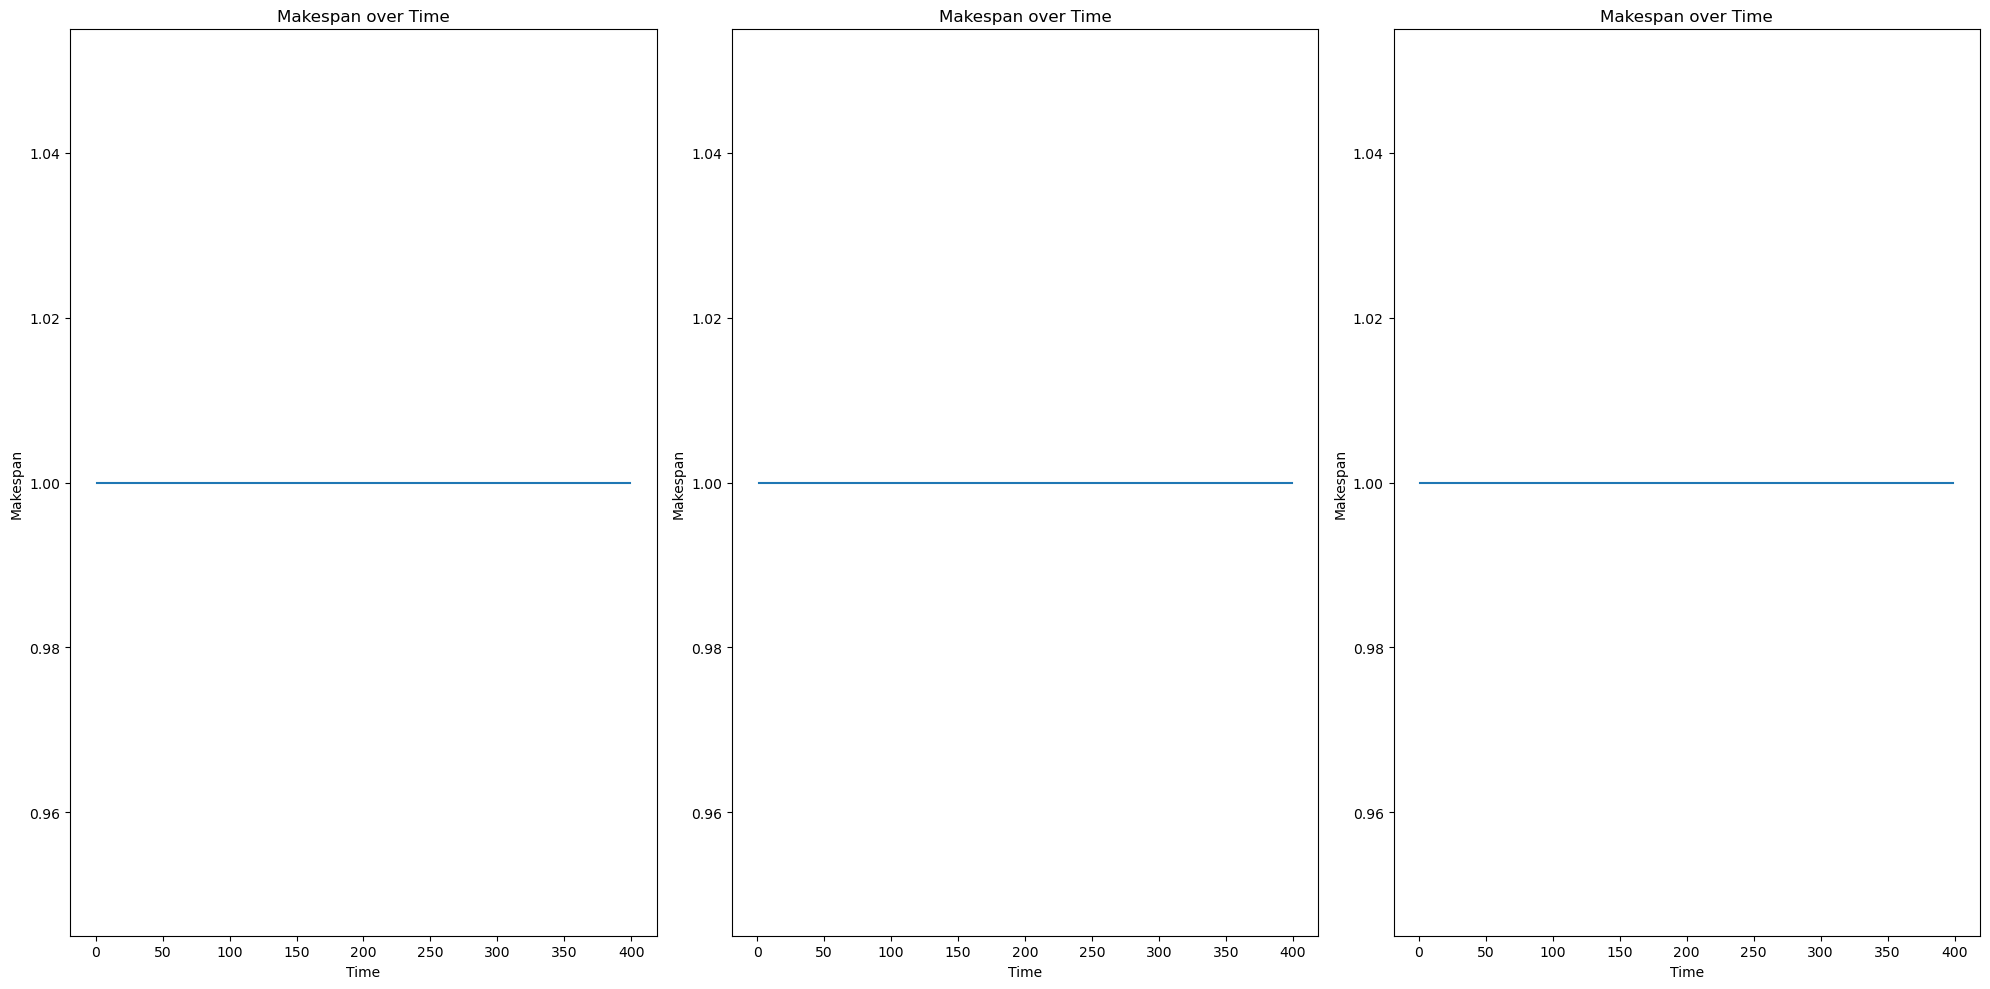

In [10]:
schedule_optimzer.plot_boltzmann_distributon()

In [11]:
num_of_machines=5
num_ops_per_machine=3

In [12]:
scheduled_jobs = JobScheduler.generate_scheduled_jobs(num_of_jobs=50,
                                                      num_of_operations_per_job=5)

job_scheduler = JobScheduler(scheduled_jobs=scheduled_jobs,
                             num_of_machines=num_of_machines,
                             num_ops_per_machine=num_ops_per_machine)

schedule = job_scheduler.generate_schedule()

schedule.compute_makespan()

789

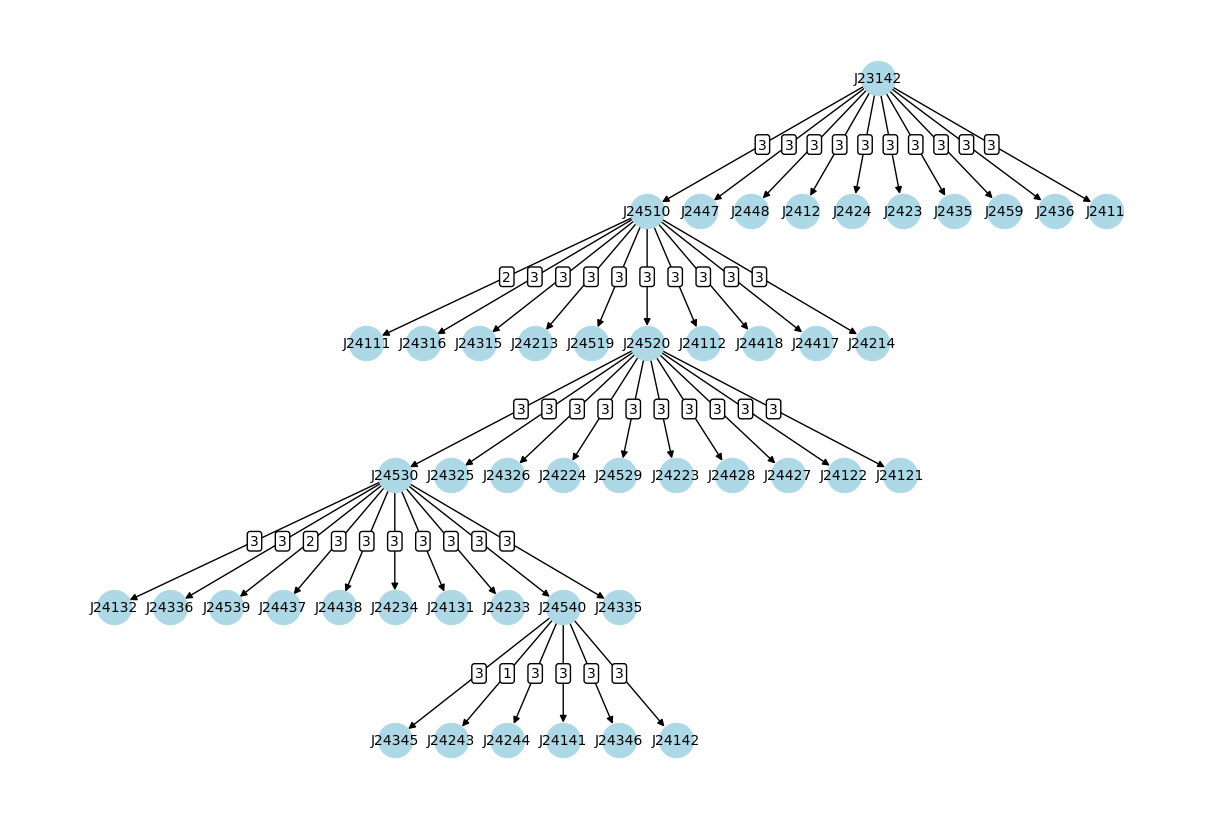

In [13]:
JobScheduler.visualize_schedule(schedule.jobs[23].operations)

In [14]:
schedule_optimzer = ScheduleOptimizer(scheduled_jobs=scheduled_jobs,
                                      num_of_machines=3,
                                      num_ops_per_machine=5)
schedule_optimzer

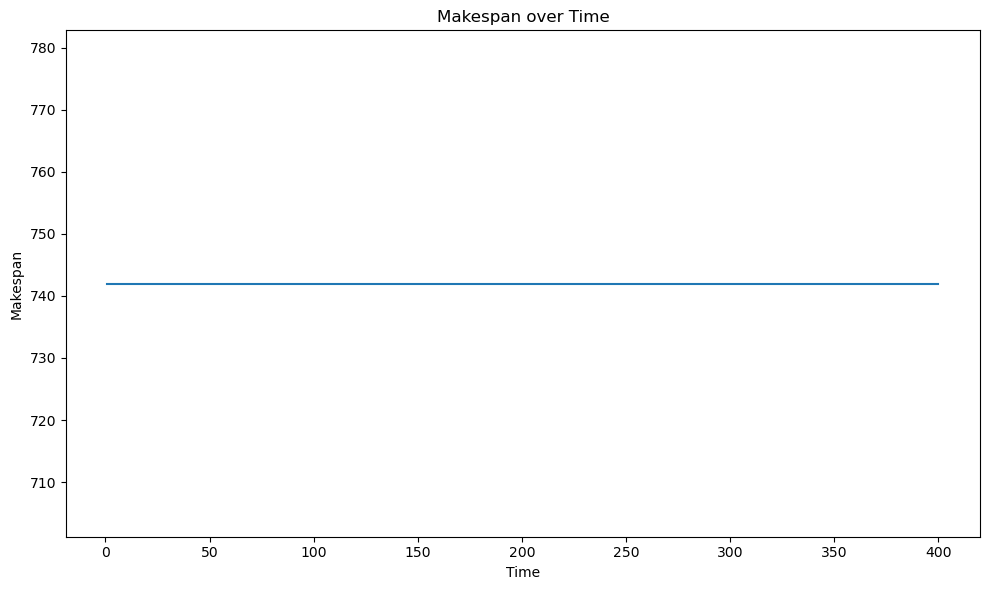

In [15]:
schedule_optimzer.plot_make_span()

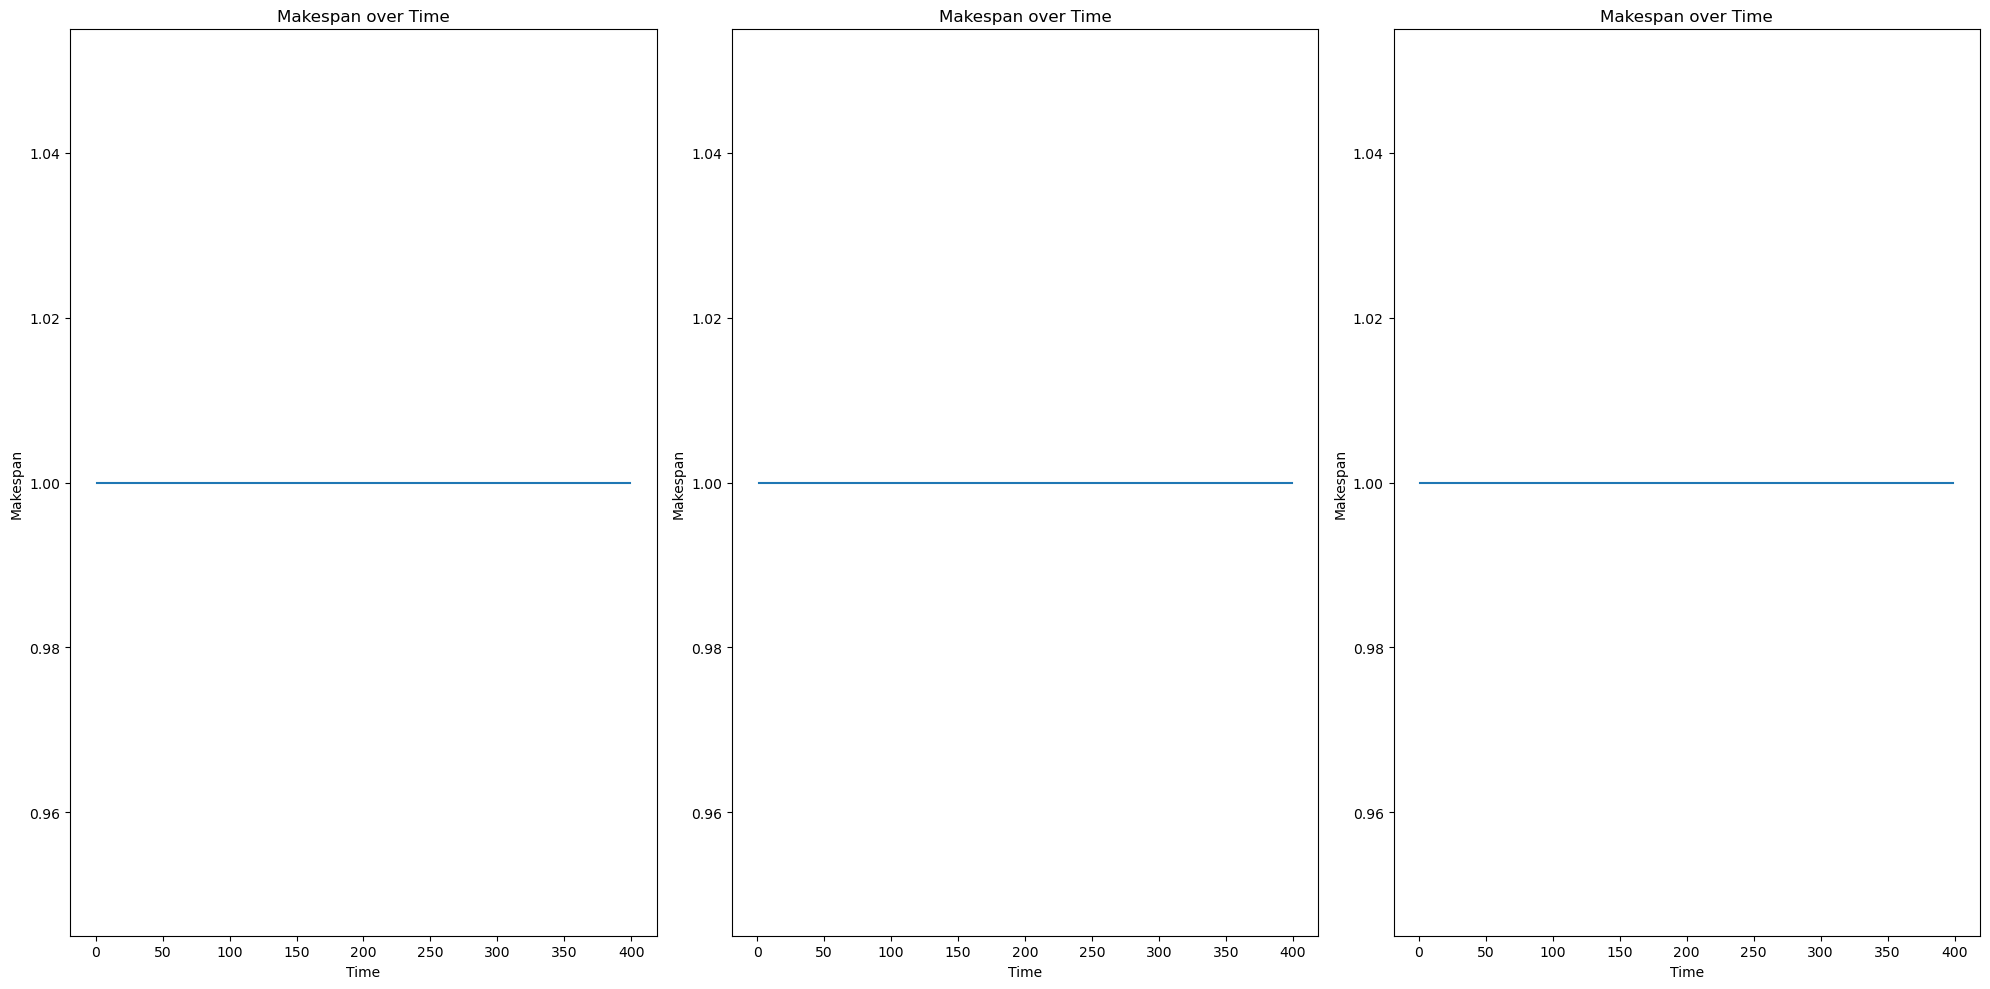

In [16]:
schedule_optimzer.plot_boltzmann_distributon()